# 기초 통계와 데이터 시각화

**통계**

- 상황을 쉽게 이해하도록 숫자로 정리하는 것

**통계의 두 가지 분야: 기술 통계 vs 추론 통계**

- 기술 통계(descriptive statistics): 데이터 요약, 핵심 특징 파악 -> 이 토픽에서 중점적으로 학습할 통계
- 추론 통계(inferential statistics): 표본을 바탕으로 모집단을 추론
  - 모집단을 직접 조사하려면 시간과 비용이 많이 들기 때문에 표본을 통해 모집단을 추론하는 것이 추론 통계의 핵심

**모집단 vs 표본**

- 모집단(population): 분석 대상이 되는 전체 집단
- 표본(sample): 모집단에서 일부를 추출한 데이터

**시각화**

- 시각화: 데이터를 이해하기 쉽게 그림으로 표현
- 시각화 목적: (1) 분석 과정에서 활용 (2) 분석 결과 전달

**대표적인 파이썬 시각화 라이브러리 비교**

| 라이브러리 | 특징 | 장점 | 단점 |
|-----------|------|------|------|
| **matplotlib** | 파이썬의 대표적인 범용 시각화 라이브러리 | 다양한 기본 그래프 제공, 커스터마이징 자유로움 | 코드가 길어질 수 있음 |
| **seaborn** | matplotlib 기반의 고급 시각화 라이브러리 | 통계 시각화에 최적화, 보기 좋은 기본 스타일 제공 | matplotlib보다 세밀한 제어가 어려울 수 있음 |

# [1] 기술 통계

**기술 통계량(Descriptive Statistics)** : 데이터를 요약·설명하는 값들

(1) 평균(mean): 데이터 합계 ÷ 데이터 개수

(2) 중앙값(median): 데이터를 정렬했을 때 중앙에 위치한 값(짝수 개면 가운데 두 값의 평균)

(3) 사분위수(quartiles): 데이터를 4등분한 값. Q1(25%)/Q2(50%, 중간값)/Q3(75%)/Q4(100%, 최댓값)

(4) 최빈값(mode): 가장 자주 등장하는 값

**데이터 유형**
- 수치형(numerical) : 사칙연산 가능, 크기 비교 가능
- 범주형(categorical) : 최빈값/종류 수 파악 가능

In [1]:
import pandas as pd

In [2]:
exam_df = pd.read_csv('exam.csv')
exam_df.head()

,math_score,science_score,english_score,second_lang
0,45.0,68.0,68.0,Chinese
1,80.0,44.0,78.0,Japanese
2,37.5,50.0,78.0,Chinese
3,57.5,56.0,78.0,Russian
4,45.0,68.0,82.0,Chinese


- `describe`: 컬럼별로 기본적인 통계 정보 확인 가능하고, `describe`은 수치형 데이터에 대해서 계산

In [3]:
exam_df.describe()

,math_score,science_score,english_score
count,200.000000,200.00000,200.000000
mean,52.830000,54.98750,77.547500
std,12.961912,9.42178,9.165507
min,15.000000,20.00000,25.000000
25%,45.000000,48.00000,72.000000
50%,52.500000,56.00000,78.000000
75%,60.000000,62.00000,84.000000
max,95.000000,90.00000,94.000000


- `describe`: 컬럼별로 기본적인 통계 정보 확인 가능하고, `describe`은 수치형 데이터에 대해서 계산
  - `include='all'`: 수치형 데이터 포함 모든 데이터 유형에 대해서 보고 싶을 때
  - `top`(최빈값), `freq`(최빈값 등장 횟수)


In [8]:
exam_df.describe(include='all') # 수치형 + 범주형
exam_df.describe(include='O') # object : 0 범주형
# exam_df.describe() #수치형만

,second_lang
count,200
unique,5
top,Chinese
freq,65


## 평균 vs 중앙값

**평균 vs 중앙값**

- 평균과 중앙값은 모두 대표값이지만, 이상치가 있을 때는 중앙값이 더 안정적인 지표

**이상치(outlier)**

- 데이터 집합에서 다른 값들과 비교해 현저히 크거나 작은 값
- 이상치 발생 원인

  (1) 오류 : 잘못 입력된 값
  
  (2) 극단값 : 실제로 매우 특이한 값

In [9]:
exam_df['math_score'].mean(), exam_df['math_score'].median()

(np.float64(52.83), np.float64(52.5))

In [10]:
exam_df['second_lang'].mode() #최빈값

0    Chinese
Name: second_lang, dtype: object

In [11]:
exam_df['second_lang'].unique() #범주형의 고유한 값들을 list

array(['Chinese', 'Japanese', 'Russian', 'German', 'French'], dtype=object)

In [13]:
exam_df['second_lang'].nunique() # unique 값들의 개수

5

In [14]:
exam_df['second_lang'].value_counts() # unique 값들 각각의 변수 수 

second_lang
Chinese     65
Japanese    43
French      38
German      37
Russian     17
Name: count, dtype: int64

### 실습) 통계 기본 상식

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8288)

## 분산과 표준편차

**분산과 표준편차**

- 목적: 데이터 값들이 평균을 중심으로 얼마나 퍼져 있는지를 수치로 표현

(1) 편차(deviation): 각 데이터 값과 평균의 차이로 편차의 합은 항상 0이다.

(2) 분산(variance): 편차를 제곱한 값들의 평균으로 제곱을 하는 이유는 편차를 양수화함과 동시에 큰 편차를 더 강조하기 위함이다.

(3) 표준편차(standard deviation): 분산에 제곱근(루트)을 씌운 값으로 루트를 씌우는 이유는 제곱된 단위를 원래 데이터 단위로 되돌리기 위함이다.

**해석**

- 분산/표준편차 작다 → 값들이 평균 근처에 몰려 있다
- 분산/표준편차 크다 → 값들이 평균에서 멀리 퍼져 있다

In [16]:
#라이브러리 불러오기
import pandas as pd

In [17]:
#importing data
body_df = pd.read_csv('body.csv')
body_df.head()

,height,weight
0,188.3,85.8
1,176.2,78.0
2,175.9,75.6
3,181.1,85.1
4,182.6,82.3


In [18]:
import numpy as np
np.var(body_df['height'])

np.float64(52.817456159999985)

In [20]:
#Pandas
print(body_df['height'].var(ddof =0)) #ddof = 0 / ddof = 1: n-1
print(body_df['height'].var(ddof =1))

# np와 pandas 분산 값이 다름 | # np : ddof = 0 / Pandas : ddof = 1 (default)
# 표본분산을 구할 때는 분모에 n-1을 넣어주기 때문 / 분모값: 자유도(degree of freedom)
# n-1을 넣는 이유는 표본의 경우 분산의 값이 작아지는 경향이 있기에 보정

52.817456159999985
52.92330276553105


In [ ]:
body_df['height'].std(ddof = 0) #표준편차
body_df['height'].std(ddof= 1) #

#분산이 크다: 평균으로부터 많이 멀어져 있다. 

In [ ]:
exam_df['english_score'].mean()
exam_df['science_score'].median()

In [ ]:
exam_df['english_score'].quantile[0.5] #0~1

# 함수를 모두 기억할 필욘 없고 앞단어 일부만 tab으로 확인가능
exam_df['english_score'].

### 실습) 데이터 분포

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8298)

177cm, 민지의 오빠는 183cm , 미닞의 어머니는 160 민지는164

In [ ]:
a = np.array([177,183,160,164])
a_df = pd.DataFrame({'f': a})

a.var()  , a_df['f'].var(ddof = 0)

(np.float64(87.5), np.float64(87.5))

In [22]:
# 공식으로 계산 by array
((a - a.mean())**2 / (len(a))).sum() #모분산
# ((a- a.mean())**2 / (len(a) -1)).sum() #표본분산

np.float64(87.5)

## 누적값 계산하기

- `cumsum()`: 누적 합계
- `cumprod()`: 누적 곱

(예시)

In [23]:
import pandas as pd
revenue_df = pd.read_csv('revenue.csv')
revenue_df.head()

,month,revenue
0,1,35.8
1,2,29.7
2,3,36.3
3,4,39.6
4,5,45.5


In [24]:
revenue_df['cumsum_col'] =  revenue_df['revenue'].cumsum()
revenue_df.head(2)

,month,revenue,cumsum_col
0,1,35.8,35.8
1,2,29.7,65.5


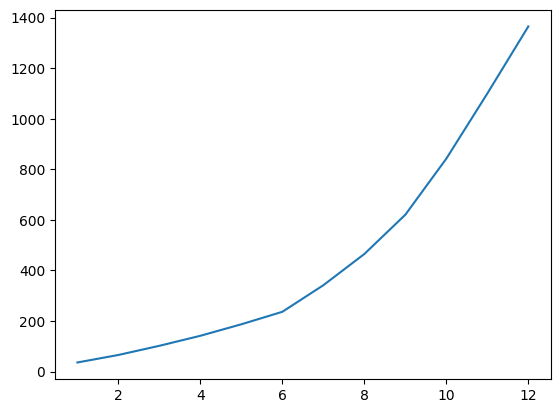

In [25]:
import matplotlib.pyplot as plt

plt.plot(revenue_df['month'], revenue_df['cumsum_col'])
plt.show()

(예시)

In [ ]:
import pandas as pd

In [27]:
interest_df = pd.read_csv('interest.csv')
interest_df['mul'] = interest_df['interest'] + 1
interest_df['cumprod_result'] = interest_df['mul'].cumprod() #누적곱
interest_df.tail(2)

,year,interest,mul,cumprod_result
18,2019,0.0174,1.0174,1.866710
19,2020,0.0104,1.0104,1.886123


### 실습) 코드댓, 성공할 수 있을까?

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8300)

실습 설명
종훈이는 일주일 전에 '코드댓'이라는 코딩 교육 서비스를 런칭했습니다. 유저를 모으기 위해 지난 일주일 동안 지인들에게 열심히 홍보도 했고, 이제 유저가 얼마나 모였는지 확인해 보려고 합니다. user_df에는 세 개의 컬럼이 있는데, day는 서비스 오픈 후 경과일, register는 그 날 회원가입한 유저 수, unregister는 그 날 탈퇴한 유저 수입니다.

새로 가입한 유저 수와 탈퇴한 유저 수를 고려해서, 일별 누적 유저 수를 한눈에 확인할 수 있도록 net_user_cumsum이라는 컬럼을 만들어서 아래와 같은 막대 그래프를 그려 보세요! 채점을 위해 plt.show() 코드 없이 작성해 주세요!



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

user_df = pd.read_csv('user.csv')
user_df['net'] = user_df['resister'] - user_df['unresister']
user_df['net_user_cumsum'] = user_df['net'].cumsum()

# # matplotlib


#Pandas
fig, ax = plt.subplots(1)
user_df.plot(kind= 'bar',x='day', y= 'net_user_cumsum')
plt.show()



KeyError: 'resister'

코딩 단축기
- Shift를 누르면서 커서를 움직이면 여러 줄 선택 가능
- 여러 줄 선택 후 command(ctrl) + / : 동시에 여러줄 주석
- command(ctrl) + > < 커서 움직이면 : 해당 줄의 처음과 끝으로 바로 이돌
- command + option(alt) + > <: 단어 단위로 이동하고 싶다.

In [ ]:
exam_df.plot(kind='box')

- `day`: 서비스 오픈 후 경과일
- `register`: 그 날 회원가입한 유저 수
- `unregister`: 그 날 탈퇴한 유저 수

# [2] matplotlib

## (1) Boxplot

**상자 그림(Boxplot)**

- 데이터 분포와 이상점을 시각적으로 보여주는 그래프로 여러 그룹 간 분포 비교에 유용하고 IQR을 이용해 이상점을 판별한다.

**상자 그림 해석**
- 가로선(Line) / 중앙선: 중간값(Median, Q2)
- 수염(Whiskers): 상자 밖으로 뻗은 선으로, 정상 범위 내의 최소값과 최댓값까지 표시
- 점(Dots): 정상 범위를 벗어난 이상점 표시

**이상점 판별 기준**

- IQR(사분위 범위) = Q3 - Q1(3사분위수에서 1사분위수를 뺀 값)으로 데이터의 중간 50% 범위를 의미
- 정상 범위를 계산했을 때, 상한과 하한을 벗어난 값들을 이상점이라고 한다.
  - 하한 = Q1 - (1.5 × IQR)
  - 상한 = Q3 + (1.5 × IQR)

In [36]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# importing data
exam_df = pd.read_csv('exam.csv')
exam_df.head()

,math_score,science_score,english_score,second_lang
0,45.0,68.0,68.0,Chinese
1,80.0,44.0,78.0,Japanese
2,37.5,50.0,78.0,Chinese
3,57.5,56.0,78.0,Russian
4,45.0,68.0,82.0,Chinese


**상자 그림 해석**
- 가로선(Line) / 중앙선: 중간값(Median, Q2)
- 수염(Whiskers): 상자 밖으로 뻗은 선으로, 정상 범위 내의 최소값과 최댓값까지 표시
- 점(Dots): 정상 범위를 벗어난 이상점 표시

**이상점 판별 기준**

- IQR(사분위 범위) = Q3 - Q1(3사분위수에서 1사분위수를 뺀 값)으로 데이터의 중간 50% 범위를 의미
- 정상 범위를 계산했을 때, 상한과 하한을 벗어난 값들을 이상점이라고 한다.
  - 하한 = Q1 - (1.5 × IQR)
  - 상한 = Q3 + (1.5 × IQR)

### 실습) 스타벅스 음료의 칼로리는?

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8290)

실습 설명
스타벅스 음료의 영양성분 데이터를 분석해 봅시다. 음료 메뉴들의 칼로리 분포를 아래와 같이 박스 플롯으로 그려 보세요. 채점을 위해 이전 영상에서 작성한 것과 같이 DataFrame에 plot() 함수를 사용해서 코드를 작성해 주세요!



In [49]:
import pandas as pd
import matplotlib.pyplot as plt

star_df = pd.read_csv('starbucks.csv')
star_df.head()

,category,beverage,option,calories,total_carbohydrates(g),total_fat(g),protein(g),cholesterol(mg),caffeine(mg)
0,Classic Espresso Drinks,Skinny Latte (Any Flavour),Grande Nonfat Milk,120,160,0.3,12.0,18,150
1,Signature Espresso Drinks,Caramel Macchiato,Grande Nonfat Milk,190,130,1.0,11.0,35,150
2,Classic Espresso Drinks,Skinny Latte (Any Flavour),Short Nonfat Milk,60,80,0.1,6.0,9,75
3,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Grande Nonfat Milk,230,190,0.2,4.0,53,0
4,Classic Espresso Drinks,Caffè Latte,Grande Nonfat Milk,130,150,0.3,13.0,19,150


## (2) Histogram

**히스토그램**

- 수치형 데이터를 구간별로 묶어 분포 형태와 패턴을 직관적으로 파악할 때 유용하고, 값을 일정한 구간(bin)으로 나누어, 각 구간에 속하는 데이터 개수를 막대 높이로 표시

**데이터 유형**

- 이산형(discrete): 개수, 사건 횟수 등
- 연속형(continuous): 키, 몸무게, 온도 등

**언제 사용?**

(1) 데이터의 전반적인 분포 파악 : 값들이 어떤 범위에 몰려 있는지, 퍼져 있는지 확인 가능

(2) 중심 경향과 변동성 확인 : 대략적인 평균, 퍼짐 정도, 치우침(왜도) 파악 가능

(3) 이상치 탐색 전 단계 : 특정 구간에 예상보다 적거나 많은 데이터가 있을 경우 이상치 가능성 확인

(4) 데이터 비교 : 두 개 이상의 집단이 비슷한 분포를 가지는지 비교할 때

(5) 정규성 판단 : 데이터가 종 모양(정규분포)에 가까운지 시각적으로 확인

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

body_df = pd.read_csv('body.csv')
body_df.head()

,height,weight
0,188.3,85.8
1,176.2,78.0
2,175.9,75.6
3,181.1,85.1
4,182.6,82.3


### 실습) 중고차 데이터 분석I

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8292)

윤수는 오랜 취업 준비 끝에 중고차 거래 플랫폼에 취업했다고 합니다. 첫 업무로 현재 판매되고 있는 중고차 데이터를 분석해 보려고 하는데요. 현대자동차의 가격대 분포를 한눈에 볼 수 있도록 아래와 같이 히스토그램(막대 10개)을 그려 보세요. 채점을 위해 plt.show() 코드 없이 작성해 주세요!



In [32]:
import pandas as pd
import matplotlib.pyplot as plt

car_df = pd.read_csv('car.csv')
car_df['manufacturer'].unique()

array(['HYUNDAI', 'TOYOTA', 'NISSAN', 'BMW', 'MERCEDES-BENZ',
       'VOLKSWAGEN', 'CHEVROLET', 'FORD', 'HONDA', 'LEXUS', 'AUDI'],
      dtype=object)

In [ ]:
#현대차 가격대 분포
[car_df['maufacturer'] == 'HYUNDAI']['Price'].plot(kind='hist', bins=100)

In [ ]:
# 현대 데이터 필터
# 방법 1
car_df.loc[car_df[]]

,manufacturer,category,fuel_type,engine_volume,mileage,price
0,HYUNDAI,Jeep,Petrol,2.0,36800,36065
1,TOYOTA,Sedan,Petrol,2.5,107000,15053
2,NISSAN,Jeep,Petrol,1.6,108222,7527
3,BMW,Jeep,Diesel,3.0,18000,15681
4,MERCEDES-BENZ,Hatchback,Petrol,1.7,160000,13485
...,...,...,...,...,...,...
12014,TOYOTA,Hatchback,Hybrid,1.5,181474,14831
12015,CHEVROLET,Jeep,Diesel,2.0,70922,41055
12016,HYUNDAI,Jeep,Diesel,2.0,273371,27858
12017,LEXUS,Jeep,LPG,4.7,170000,34497


## (3) PDF와 KDE Plot

**확률 밀도 함수(Probability Density Function, PDF)**

- 모집단 전체를 표현하는 이상적 개념으로 연속형 데이터의 이론적 분포를 비중(확률)으로 표현하고, 특정 값 자체의 확률은 0, 그래프 전체 넓이는 1이다.

**KDE Plot**

- KDE Plot(Kernel Density Estimation)

- 표본 데이터를 바탕으로 확률 밀도 함수를 추정하고, 연속형 데이터의 분포를 부드럽게 표현

<Axes: ylabel='Frequency'>

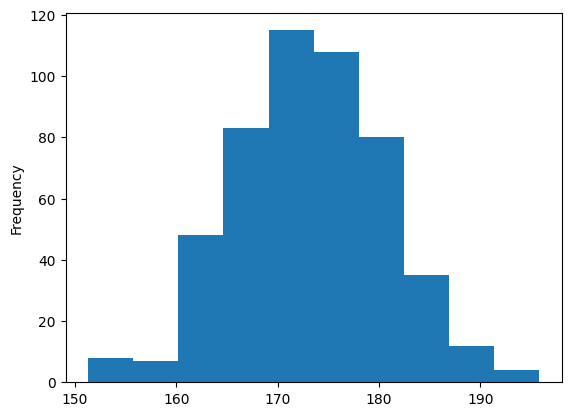

In [34]:
body_df['height'].plot(kind='hist')

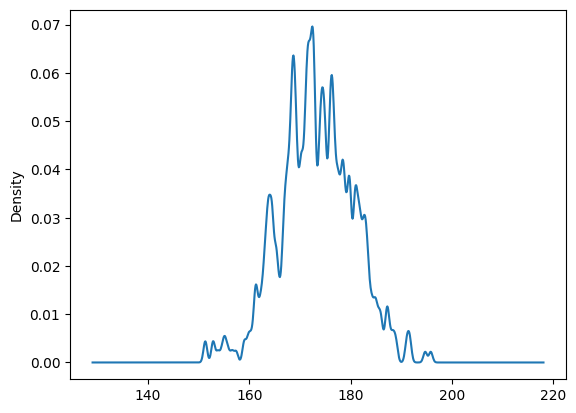

In [ ]:
#밀도의 개념
#숫자들로 데이터를 파악하기 보다는 어디에 치우쳐져 있느냐를 기준으로 판단.
#  
body_df['height'].plot(kind='kde', bw_method =0.05) # 숫자가 커지면 완만 / 작으면 디테일 표현
plt.show()

### 실습) 중고차 데이터 분석 II

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8352)

In [41]:
car_df.columns


Index(['manufacturer', 'category', 'fuel_type', 'engine_volume', 'mileage',
       'price'],
      dtype='object')

In [ ]:

car_df['manufacturer'].unique()

array(['HYUNDAI', 'TOYOTA', 'NISSAN', 'BMW', 'MERCEDES-BENZ',
       'VOLKSWAGEN', 'CHEVROLET', 'FORD', 'HONDA', 'LEXUS', 'AUDI'],
      dtype=object)

<Axes: ylabel='Frequency'>

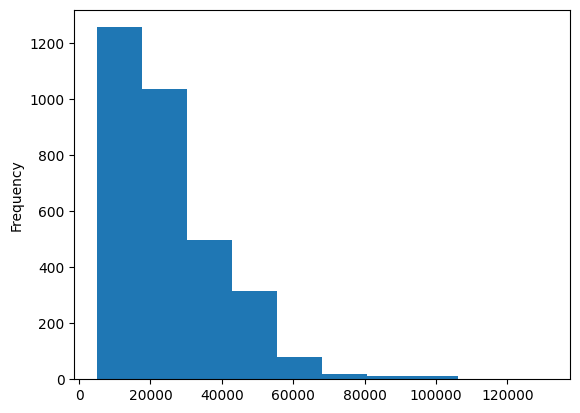

In [42]:
car_df[car_df['manufacturer'] == 'HYUNDAI' ]['price'].plot(kind='hist')

In [45]:
car_df['mileage'].quantile(0.25), car_df['mileage'].quantile(0.75) #하한값, 상한값

(np.float64(70000.0), np.float64(177932.0))

# [3] seaborn

- **seaborn** : matplotlib 기반 통계 시각화 라이브러리

- **장점**  
  - 코드가 간결하고, 기본 스타일이 세련되어 빠르게 가독성 높은 그래프 생성

- **matplotlib과 비교**  
  - matplotlib : 원하는 대로 커스터마이징 가능  
  - seaborn : 기본 그래프가 깔끔하고 통계 시각화에 특화

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


| 변수명        | 설명 |
|---------------|------------------------------------------------|
| month         | 월|
| day           | 일|
| quarter       | 분기|
| day_of_week   | 요일 (0=월요일, 6=일요일) |
| workingday    | 근무일 여부 (1=평일이면서 휴일 아님, 0=주말/휴일) |
| holiday       | 공휴일 여부 (1=공휴일, 0=평일/주말) |
| temperature   | 기온 (섭씨) |
| humidity      | 습도 (0~100) |
| windspeed     | 풍속 (m/s) |
| registered    | 등록된 사용자(회원)의 이용 건수 |
| casual        | 비회원(일시 사용자)의 이용 건수 |
| total         | 전체 이용 건수 (`registered + casual`) |

In [47]:
bike_df = pd.read_csv("bike.csv")
bike_df.head()

,month,day,quarter,day_of_week,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
0,1,1,1Q,SUN,n,n,21.4,72,12,1608,686,2294
1,1,2,1Q,MON,n,y,15.0,44,19,1707,244,1951
2,1,3,1Q,TUE,y,n,7.6,39,23,2147,89,2236
3,1,4,1Q,WED,y,n,0.4,35,11,2273,95,2368
4,1,5,1Q,THU,y,n,14.2,49,6,3132,140,3272


## set_theme() : 그래프 커스터마이징

In [54]:
sns.set_theme(rc = {'figure.figsize': (8,3)},style='white')

C:\Users\suhyeon\AppData\Local\Temp\ipykernel_30644\1923182494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = bike_df, x = 'month', y = 'total',


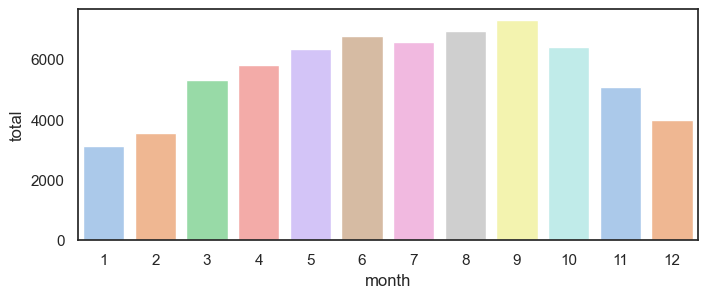

In [57]:
sns.barplot(data = bike_df, x = 'month', y = 'total',
             errorbar=None, palette = 'pastel' ) #errorbar: 신뢰구간 | palette: 'pastel' 'colorblind'
plt.show()

**set_theme() : 그래프 커스터마이징하기**

- style에 dark, whitegrid, ticks
- palette에 pastel, muted, bright, dark, colorblind

In [58]:
sns.set_theme(rc = {'figure.figsize': (8,3)},style='dark')

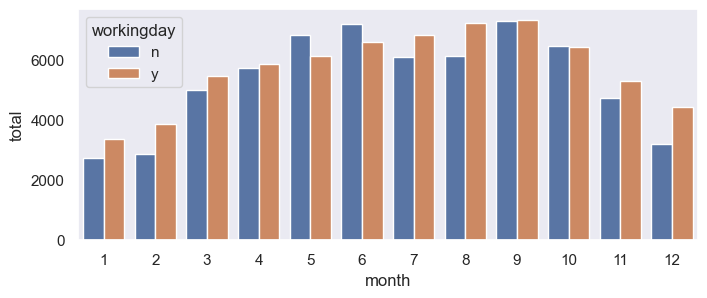

In [60]:
#월별 근무일별 자전거 총 대여량
sns.barplot(data = bike_df, x= 'month', y = 'total', hue = 'workingday', errorbar =None) #hue -> 그룹핑해준다. 
plt.show()

<Axes: xlabel='month', ylabel='registered'>

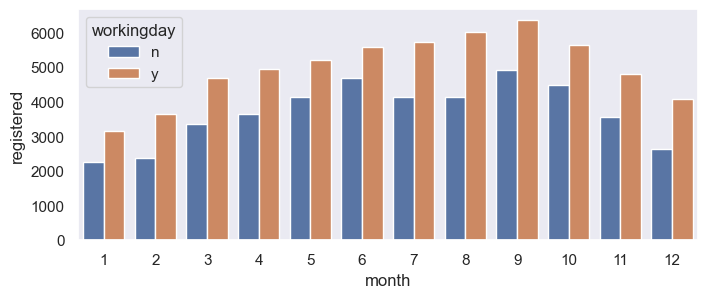

In [63]:
#월별 근무일별 회원의 자전거 대여량
sns.barplot(data=bike_df, x= 'month',y = 'registered', hue='workingday', errorbar = None) #hue그룹핑해준다


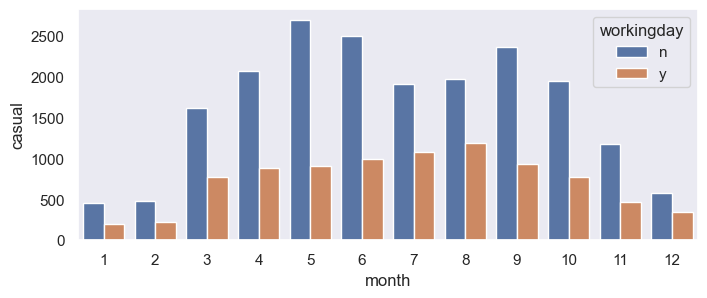

In [64]:
#월별 근무일별 비회원의 자전거 대여량
sns.barplot(data=bike_df, x= 'month',y = 'casual', hue='workingday', errorbar = None) #hue그룹핑해준다
plt.show()

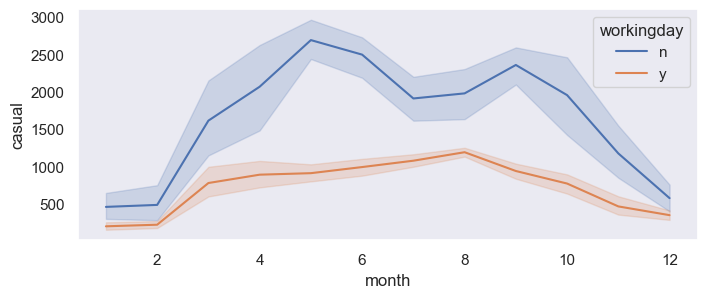

In [ ]:
#월별 근무일별 비회원의 자전거 대여량
#lineplot -> errorbar 있게 두면 평균에서 벗어난 오차범위 정도를 볼 수 있음. 
sns.lineplot(data=bike_df, x= 'month',y = 'casual', hue='workingday') #hue그룹핑해준다
plt.show()

### 실습) 공유 자전거 데이터 더 살펴보기 I

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8303)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv('/datalab/bike.csv')
bike_df.describe()

,month,day,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,6.513661,15.756831,0.683060,0.030055,20.567213,62.445355,12.172131,4581.450820,1018.483607,5599.934426
std,3.455958,8.823592,0.465921,0.170971,8.323297,15.177164,7.585884,1424.331846,758.989897,1788.667868
min,1.000000,1.000000,0.000000,0.000000,0.400000,21.000000,-7.000000,20.000000,2.000000,22.000000
25%,4.000000,8.000000,0.000000,0.000000,14.700000,51.000000,7.000000,3730.500000,429.750000,4369.000000
50%,7.000000,16.000000,1.000000,0.000000,20.750000,62.000000,11.000000,4776.500000,904.500000,5927.000000
75%,9.750000,23.000000,1.000000,0.000000,26.500000,73.000000,17.000000,5663.000000,1262.000000,7011.250000
max,12.000000,31.000000,1.000000,1.000000,41.500000,108.000000,38.000000,6946.000000,3410.000000,8714.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv('/datalab/bike.csv')
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')


## (1) stripplot

- **정의** : strip은 가느다란 조각이라는 뜻을 가지고 있고, 범주형 데이터의 분포를 점(개별 관측치)으로 표현하는 그래프

- **특징**
  - 각 범주(category)별 데이터 포인트 시각화
  - 값의 분포와 밀집 정도를 직관적으로 확인 가능
  - `jitter=True` 옵션을 사용하여 데이터 포인트를 수평으로 흩뿌려 겹침 방지
  - `hue` 인자로 그룹을 색상별로 구분 가능

- **사용 상황**
  - 소규모 데이터셋 분포 확인
  - 범주별 데이터 비교

- 월별로 데이터가 어떻게 분포되어 있는지 확인 가능하다.
- 여름, 가을에는 데이터가 비교적 높은 곳에 분포하고, 겨울에는 비교적 낮은 곳에 분포하고 있음을 알 수 있다.

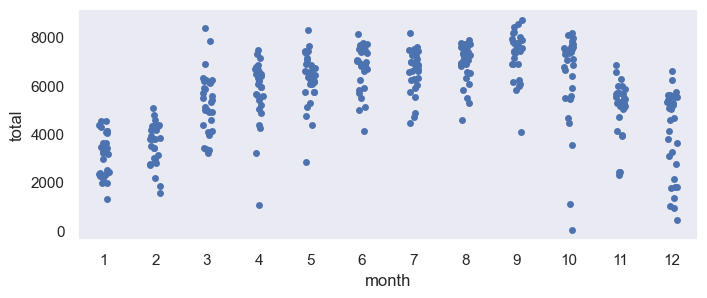

In [66]:
sns.stripplot(data = bike_df, x= 'month',y = 'total')
plt.show()

### 실습) 공유 자전거 데이터 더 살펴보기 II

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8304?mediumTypedId=U2tpbGxQYXRoOjYyYjJjMjAyNzAwOWM1N2E1MjQwMThmYQ%3D%3D)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv('/datalab/bike.csv')
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')


## (2) swarmplot

- **정의** : 범주형 데이터의 분포를 점으로 표현하며, **데이터 포인트가 겹치지 않도록** 배치하는 그래프
- **특징**
  - `stripplot`과 유사하지만 점이 겹치지 않게 자동 조정
  - 데이터의 분포와 밀도를 직관적으로 확인 가능
  - 값의 수가 많으면 표시가 복잡해질 수 있음
  - `hue` 인자로 색상 그룹화 가능
- **사용 상황**
  - 범주형 데이터의 분포를 더 깔끔하게 보고 싶을 때
  - `stripplot`의 겹침 문제를 해결하고자 할 때

swarm은 떼, 무리라는 의미로 값들이 몰려있는 경우 옆으로 쌓여서 stripplot보다 보기가 편함

## (3) Box Plot

- **정의** : 데이터의 분포를 사분위수(Q1, Q3)와 중앙값(median)으로 표현하는 그래프

- **특징**
  - 박스(Box): Q1 ~ Q3(IQR, interquartile range)
  - 선(Whisker): 데이터의 전체 범위(보통 Q1-1.5*IQR ~ Q3+1.5*IQR)
  - 점(Point): 이상치(outlier)
  - 데이터의 중심, 분산, 이상치를 한눈에 파악 가능

- **사용 상황**
  - 그룹별 데이터 분포 비교
  - 이상치 탐지 및 데이터 분포 요약

- 등록된 사용자(회원)들이 주말에는 이용 대수가 적음을 알 수 있다.

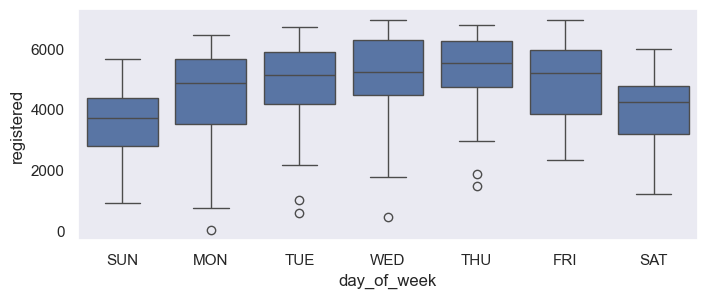

In [ ]:
#order --> 순서 바꾸고 싶을 떄
sns.boxplot(data = bike_df, x= 'day_of_week',y= 'registered', order=['Mon','TUE','','','',''])
plt.show()

In [68]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs
)
    Draw a box plot to show distributions with respect to categories.

    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.


## (4) Violin Plot

- **정의** : `boxplot`에 밀도 분포(KDE)를 더한 그래프
- **특징**
  - 중앙값과 사분위수는 boxplot처럼 표현
  - 데이터 분포 모양을 KDE 플롯을 양옆으로 붙여 놓은 바이올린 형태로 표시
  - 분포의 대칭성, 치우침 등 여부를 파악 가능
  - `hue` 옵션으로 그룹 비교 가능
- **사용 상황**
  - 데이터의 분포 형태를 더 직관적으로 보고 싶을 때
  - boxplot만으로는 파악하기 어려운 분포 특성을 설명할 때

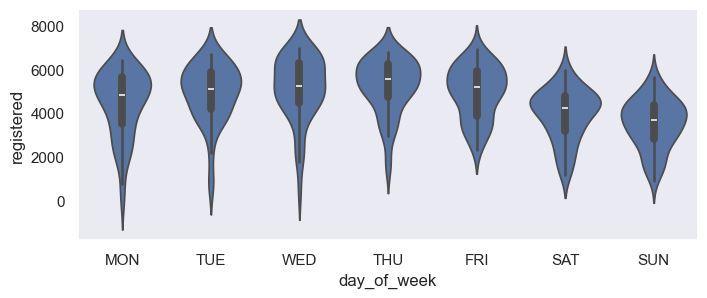

In [ ]:
#완만한 종모양인지 뾰족하게 있는지../ 중앙에 몰려있는지..등
#bw_method 
sns.violinplot(data=bike_df, x="day_of_week", y="registered", order=['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
plt.show()

### 실습) 이코노미와 비즈니스

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8307?mediumTypedId=U2tpbGxQYXRoOjYyYjJjMjAyNzAwOWM1N2E1MjQwMThmYQ%3D%3D)

In [ ]:
flight_df = pd.read_csv("flight.csv")[['class,'price']]
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,GO_FIRST,G8-803,Bangalore,Evening,one,Late_Night,Mumbai,Economy,7.17,25,70
1,Vistara,UK-827,Mumbai,Night,one,Morning,Delhi,Economy,12.75,43,66
2,Vistara,UK-850,Bangalore,Evening,one,Night,Hyderabad,Business,25.00,7,513
3,SpiceJet,SG-678,Chennai,Early_Morning,one,Morning,Delhi,Economy,27.17,49,73
4,Air_India,AI-660,Mumbai,Evening,one,Morning,Chennai,Economy,14.92,7,124
...,...,...,...,...,...,...,...,...,...,...,...
9995,Air_India,AI-888,Mumbai,Evening,one,Evening,Chennai,Business,24.00,33,670
9996,Vistara,UK-824,Chennai,Night,one,Night,Bangalore,Economy,24.42,6,131
9997,Air_India,AI-615,Mumbai,Early_Morning,one,Night,Delhi,Business,15.25,45,555
9998,Vistara,UK-816,Bangalore,Morning,one,Evening,Kolkata,Economy,8.08,32,110


## (5) Histogram

- **정의** : 연속형 데이터를 구간(bin)으로 나누어 각 구간에 속하는 데이터의 개수를 막대그래프로 표현
- **특징**
  - 데이터의 분포 형태(대칭, 치우침, 다봉형 등)를 직관적으로 확인
  - `bins` 매개변수로 구간 개수 조절 가능
  - `kde`(밀도 곡선)와 함께 그리면 분포를 더 부드럽게 파악 가능
- **사용 상황**
  - 데이터가 어떤 범위에 많이 분포하는지 확인
  - 이상치(outlier) 탐지
  - 분포가 정규분포에 가까운지 확인

In [ ]:
sns.set_theme(rc = {figure})
#kde = True 추이를 볼 수 있음
#x= ->y= : 그래프 눕힐 수 있음. 
#hue: 그룹핑 -> 많이 사용
#multiple: 'stack'

 

### 실습) 흡연여부와 보헙금

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8308?mediumTypedId=U2tpbGxQYXRoOjYyYjJjMjAyNzAwOWM1N2E1MjQwMThmYQ%3D%3D)

In [ ]:
insurance_df = pd.read_csv("/datalab/insurance_charge.csv")
insurance_df

,age,sex,bmi,smoking,children,charge
0,28,female,28.6,no,1,4318
1,28,male,27.0,no,2,4435
2,57,male,24.7,no,1,12002
3,25,male,35.6,no,0,2534
4,30,male,32.9,no,5,6380
...,...,...,...,...,...,...
2590,62,male,30.9,yes,3,46718
2591,47,male,27.8,yes,3,24972
2592,27,male,42.3,yes,1,44246
2593,38,male,40.0,yes,3,43223


## (6) KDE Plot

- **정의** : 커널 밀도 추정(Kernel Density Estimation, KDE)을 이용해 **데이터의 분포를 연속적인 곡선**으로 표현한 그래프
- **특징**
  - 히스토그램과 달리 매끄러운 분포 곡선 제공
  - 데이터의 치우침(skewness), 대칭성, 다중 봉우리 여부 확인 가능
  - `fill=True` 옵션 → 곡선 아래 영역 색칠 가능
  - `hue` 인자로 그룹별 분포 비교 가능
- **사용 상황**
  - 데이터의 분포 패턴을 직관적으로 파악
  - 여러 집단의 분포 비교

In [ ]:
sns.kdeplot(data = bike_df, x= "registered")

<Axes: xlabel='registered', ylabel='Density'>

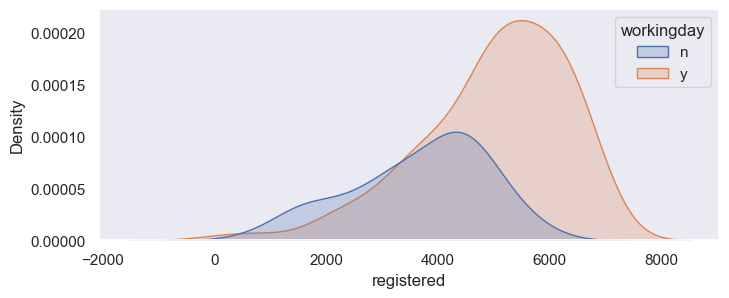

In [71]:
sns.kdeplot(data = bike_df, x = 'registered' ,fill =True, bw_method= 0.4, hue = 'workingday')

## (7) Scatter Plot

- **정의** : 두 연속형 변수의 관계를 **좌표평면에 점으로 표시**하는 그래프
- **특징**
  - X축과 Y축 각각 하나의 변수 대응
  - 변수 간 상관관계(양/음, 강도) 시각화
  - 이상치(outlier) 탐지에 유용
  - `hue`, `style`, `size`로 추가 변수 시각화 가능
- **사용 상황**
  - 두 변수 사이의 관계 분석
  - 데이터의 분산 정도 및 패턴 확인

- 기온이 낮을 때는 자전거 대여 건수가 낮고, 기온이 높을 때는 자전거 대여 건수도 높음을 알 수 있다.

In [ ]:
sns.set_option(rc={'figure.figsize': (6,6)}, style = 'white')
sns.scatterplot(data=bike_df, x = 'temperature')

In [ ]:
bike_df[['temperature','total']].corr()
#실제 사회에서 0.5 넘는 데이터를 보기도 쉽지 않은데 0.6이면 굉장히 높은 편 

,temperature,total
temperature,1.00000,0.64386
total,0.64386,1.00000


## (8) Regplot

- **정의** : 두 변수 간의 관계를 산점도와 함께 회귀선(Regression Line)으로 표현하는 그래프

- **특징**
  - 산점도 + 선형 회귀선 표시
  - 데이터 간의 선형성 여부 확인 가능
  - 이상치의 영향을 시각적으로 파악 가능

- **사용 상황**
  - 두 변수의 상관관계 분석
  - 회귀선을 통해 추세선 확인
  - 선형 회귀 기반 예측 가능성 탐색

**CI(Confidence Interval)**
- `ci` 옵션으로 신뢰구간(Confidence Interval) 시각화

- **기능** : 회귀선 주변에 표시되는 신뢰구간(Confidence Interval)의 범위를 지정

- **사용법**
  - `ci=95` : 95% 신뢰구간 (기본값) : 같은 데이터로 여러 번 샘플링했을 때, 95%의 확률로 실제 회귀선이 이 구간 안에 포함됨을 의미
  - `ci=None` : 신뢰구간 표시하지 않음
  - `ci=숫자` : 원하는 신뢰수준 적용 (예: 68, 90)

<Axes: xlabel='humidity', ylabel='total'>

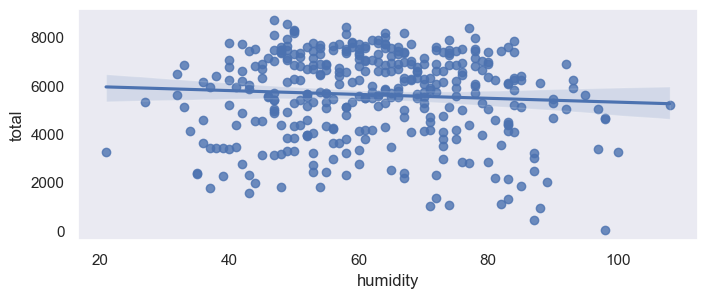

In [74]:
sns.regplot(data = bike_df, x ='humidity', y = 'total')

### 실습) 비싼 와인이 더 맛있을까?

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8310?mediumTypedId=U2tpbGxQYXRoOjYyYjJjMjAyNzAwOWM1N2E1MjQwMThmYQ%3D%3D)

In [ ]:
wine_df = pd.read_csv("/datalab/wine.csv")
wine_df

,title,country,province,region_1,region_2,winery,points,price
0,L'Ecole No. 41 2016 Chardonnay (Columbia Valle...,US,Washington,Columbia Valley (WA),Columbia Valley,L'Ecole No. 41,91.5,22.8
1,Hanging Vine 2007 Parcel 4 Chardonnay (Lodi),US,California,Lodi,Central Valley,Hanging Vine,82.3,12.8
2,Irony 2008 Pinot Noir (Monterey County),US,California,Monterey County,Central Coast,Irony,85.4,15.6
3,Sonoma-Cutrer 2008 Russian River Ranches Chard...,US,California,Sonoma Coast,Sonoma,Sonoma-Cutrer,92.8,23.3
4,Gibbs 2013 Money Road Vineyard Merlot (Oakville),US,California,Oakville,Napa,Gibbs,85.0,24.7
...,...,...,...,...,...,...,...,...
95,Clos du Val 2009 JG's Joie du Vin Cabernet Sau...,US,California,Stags Leap District,Napa,Clos du Val,96.7,400.6
96,Bryant Family 2009 Cabernet Sauvignon (Napa Va...,US,California,Napa Valley,Napa,Bryant Family,96.3,335.7
97,Alpha Omega 2012 ERA Red (Napa Valley),US,California,Napa Valley,Napa,Alpha Omega,99.6,300.9
98,Hundred Acre 2008 Few and Far Between Vineyard...,US,California,Napa Valley,Napa,Hundred Acre,94.2,300.2


In [75]:
sns.regplot(data = wine_df, x ='price', y = 'points')

NameError: name 'wine_df' is not defined

## (9) Correlation Heatmap

- **산점도 (Scatter Plot)** : 두 변수 간의 관계를 점으로 표현
- **상관계수 (Correlation Coefficient)**
  - 피어슨(Pearson) 상관계수: -1 ~ 1 범위
  - `= 0` → 두 변수 간 상관 없음
  - `> 0` → 양의 상관관계(한 변수가 커질수록 다른 변수도 커짐)
  - `< 0` → 음의 상관관계(한 변수가 커질수록 다른 변수는 작아짐)
  - **상관관계의 강도**: 절댓값이 1에 가까울수록 강함

In [77]:
corr = bike_df.corr(numeric_only = True)

<Axes: >

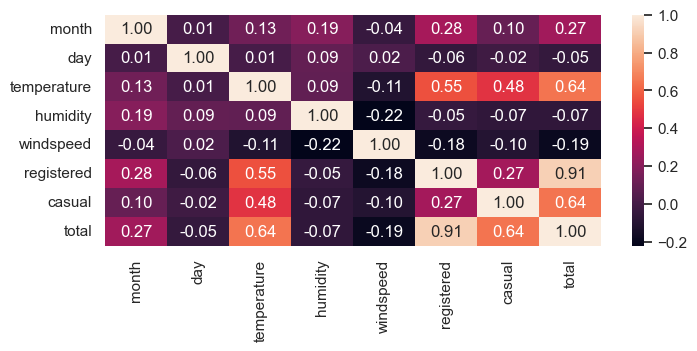

In [80]:
sns.heatmap(corr, annot=True, fmt ='.2f')

### 실습) 보험료 데이터 분석하기

[링크](https://www.codeit.kr/topics/statistics-and-visualization/lessons/8311?mediumTypedId=U2tpbGxQYXRoOjYyYjJjMjAyNzAwOWM1N2E1MjQwMThmYQ%3D%3D)

In [82]:
insurance_df = pd.read_csv("insurance_charge.csv")
insurance_df

,age,sex,bmi,smoking,children,charge
0,28,female,28.6,no,1,4318
1,28,male,27.0,no,2,4435
2,57,male,24.7,no,1,12002
3,25,male,35.6,no,0,2534
4,30,male,32.9,no,5,6380
...,...,...,...,...,...,...
2590,62,male,30.9,yes,3,46718
2591,47,male,27.8,yes,3,24972
2592,27,male,42.3,yes,1,44246
2593,38,male,40.0,yes,3,43223


<Axes: >

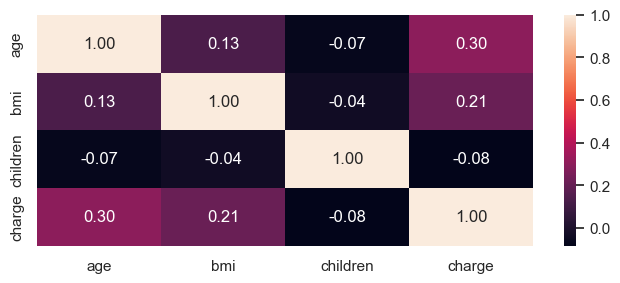

: 

In [ ]:
corr = insurance_df.corr(numeric_only = True)
sns.heatmap(corr, annot =True, fmt = '0.2f')